In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df = pd.read_csv('netflix.csv', encoding='latin1')

In [183]:
#Data Exploration
# Check if the data loaded correctly
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [184]:
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())



First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24

In [185]:
print("Shape of the dataset (rows, columns):", df.shape)

Shape of the dataset (rows, columns): (8809, 12)


In [186]:
print("Column names:")
print(df.columns)

print("\nData types of each column:")
print(df.dtypes)


Column names:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Data types of each column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [187]:
print("Missing values count:")
print(df.isnull().sum())

Missing values count:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [188]:
print("Summary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
       release_year
count   8809.000000
mean    2014.181292
std        8.818932
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2024.000000


In [197]:
# Find duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("Duplicates removed. New shape:", df.shape)


Number of duplicate rows: 0
Duplicates removed. New shape: (8809, 12)


In [199]:
print("Count of unique values in each column:")
print(df.nunique())

Count of unique values in each column:
show_id         8809
type               2
title           8806
director        4529
cast            7694
country          748
date_added      1768
release_year      75
rating            18
duration         220
listed_in        516
description     8777
dtype: int64


In [201]:
print("Count of unique values in each column:")
print(df.nunique())

Count of unique values in each column:
show_id         8809
type               2
title           8806
director        4529
cast            7694
country          748
date_added      1768
release_year      75
rating            18
duration         220
listed_in        516
description     8777
dtype: int64


In [203]:
#Data Cleaning
# Fill missing values in all numerical columns with their mean
df.fillna(df.mean(numeric_only=True), inplace=True)

print("Missing values filled with column means.")


Missing values filled with column means.


In [205]:
# Remove rows containing any null value
df_cleaned = df.dropna()

print("Rows with missing values dropped. New shape:", df_cleaned.shape)


Rows with missing values dropped. New shape: (5334, 12)


In [207]:
# Replace 'NA' values with NaN
df.replace('NA', np.nan, inplace=True)

print("Replaced 'NA' with NaN.")


Replaced 'NA' with NaN.


In [209]:
#Remove a specific column from the dataset.
df.drop(columns=['date_added'], inplace=True)

print("Column 'date_added' removed.")


Column 'date_added' removed.


In [211]:
# Rename a column from 'old_name' to 'new_name'
df.rename(columns={'country': 'origin'}, inplace=True)

print("Column renamed successfully.")

Column renamed successfully.


In [213]:
#Data Selection and Filtering
print("director column (or equivalent):")
print(df['director'])


director column (or equivalent):
0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
8807       Yeon Sang-ho
8808       Susanne Bier
Name: director, Length: 8809, dtype: object


In [215]:
print("Selected Name and City columns:")
print(df[['title', 'origin']])


Selected Name and City columns:
                      title         origin
0      Dick Johnson Is Dead  United States
1             Blood & Water   South Africa
2                 Ganglands            NaN
3     Jailbirds New Orleans            NaN
4              Kota Factory          India
...                     ...            ...
8804             Zombieland  United States
8805                   Zoom  United States
8806                 Zubaan          India
8807     Parasyte: The Grey    South Korea
8808                 Serena  United States

[8809 rows x 2 columns]


In [217]:
print("Rows where release_year is greater than 2009:")
print(df[df['release_year'] > 2009])


Rows where release_year is greater than 2009:
     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8801   s8802    Movie                Zinzana  Majid Al Ansari   
8803   s8804  TV Show            Zombie Dumb              NaN   
8806   s8807    Movie                 Zubaan      Mozez Singh   
8807   s8808  TV Show     Parasyte: The Grey     Yeon Sang-ho   
8808   s8809    Movie                 Serena     Susanne Bier   

                                                   cast  \
0                                                   NaN   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...

In [219]:
print('Rows where Origin is "United States":')
print(df[df['origin'] == 'United States'])


Rows where Origin is "United States":
     show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
9        s10    Movie          The Starling   Theodore Melfi   
15       s16  TV Show     Dear White People              NaN   
27       s28    Movie             Grown Ups     Dennis Dugan   
28       s29    Movie            Dark Skies    Scott Stewart   
...      ...      ...                   ...              ...   
8793   s8794    Movie  Yours, Mine and Ours     Raja Gosnell   
8802   s8803    Movie                Zodiac    David Fincher   
8804   s8805    Movie            Zombieland  Ruben Fleischer   
8805   s8806    Movie                  Zoom     Peter Hewitt   
8808   s8809    Movie                Serena     Susanne Bier   

                                                   cast         origin  \
0                                                   NaN  United States   
9     Melissa McCarthy, Chris O'Dowd, Kevin K

In [221]:
#Sorting and Ordering
print("DataFrame sorted by release_year in ascending order:")
print(df.sort_values(by='release_year', ascending=True))


DataFrame sorted by release_year in ascending order:
     show_id     type                                          title  \
4250   s4251  TV Show              Pioneers: First Women Filmmakers*   
7790   s7791    Movie                                 Prelude to War   
8205   s8206    Movie                           The Battle of Midway   
8660   s8661    Movie  Undercover: How to Operate Behind Enemy Lines   
8763   s8764    Movie                WWII: Report from the Aleutians   
...      ...      ...                                            ...   
857     s858  TV Show                                   The Neighbor   
855     s856  TV Show                 Jurassic World Camp Cretaceous   
853     s854    Movie                               Army of the Dead   
965     s966  TV Show                                         Yasuke   
8807   s8808  TV Show                             Parasyte: The Grey   

          director                                               cast  \
4250     

In [223]:
print("DataFrame sorted by Origin alphabetically:")
print(df.sort_values(by='origin'))

DataFrame sorted by Origin alphabetically:
     show_id     type                             title  \
365     s366    Movie                   Eyes of a Thief   
193     s194  TV Show                              D.P.   
3681   s3682    Movie     River, el mÃ¡s grande siempre   
2565   s2566  TV Show                      Almost Happy   
3576   s3577  TV Show  Apache: The Life of Carlos Tevez   
...      ...      ...                               ...   
8718   s8719    Movie            Westside vs. the World   
8759   s8760    Movie            World's Weirdest Homes   
8783   s8784  TV Show                              Yoko   
8785   s8786  TV Show                               YOM   
8803   s8804  TV Show                       Zombie Dumb   

                                              director  \
365                                       Najwa Najjar   
193                                                NaN   
3681  Marcelo Altmark, Mariano Mucci, Luis A. Scalella   
2565            

In [225]:
print("DataFrame sorted by Duration in descending order:")
print(df.sort_values(by='duration', ascending=False))


DataFrame sorted by Duration in descending order:
     show_id     type                                     title  \
1832   s1833    Movie                                      Zozo   
7924   s7925    Movie                Salem: His Sister's Father   
1663   s1664    Movie  Dolly Partonâs Christmas on the Square   
5146   s5147    Movie                                The Worthy   
4882   s4883    Movie                                   Thi Mai   
...      ...      ...                                       ...   
3524   s3525  TV Show                                   Top Boy   
4403   s4404  TV Show                            Medal of Honor   
5541   s5542    Movie                           Louis C.K. 2017   
5794   s5795    Movie                     Louis C.K.: Hilarious   
5813   s5814    Movie      Louis C.K.: Live at the Comedy Store   

               director                                               cast  \
1832        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi,

In [227]:
print("DataFrame sorted by Origin and then by Release year:")
print(df.sort_values(by=['origin', 'release_year']))


DataFrame sorted by Origin and then by Release year:
     show_id     type                                              title  \
365     s366    Movie                                    Eyes of a Thief   
193     s194  TV Show                                               D.P.   
303     s304    Movie                               Esperando la carroza   
6705   s6706    Movie                               Esperando La Carroza   
7745   s7746    Movie                                 Pizza, birra, faso   
...      ...      ...                                                ...   
1250   s1251    Movie                                          Connected   
1262   s1263    Movie                   Ginny & Georgia - The Afterparty   
1299   s1300  TV Show                           Thus Spoke Kishibe Rohan   
1418   s1419    Movie  Chris Rock Total Blackout: The Tamborine Exten...   
1436   s1437    Movie  Ratones Paranoicos: The Band that Rocked Argen...   

                                  

In [229]:
print("Top 3 rows sorted by Release year:")
print(df.sort_values(by='release_year').head(3))


Top 3 rows sorted by Release year:
     show_id     type                              title     director  \
4250   s4251  TV Show  Pioneers: First Women Filmmakers*          NaN   
7790   s7791    Movie                     Prelude to War  Frank Capra   
8205   s8206    Movie               The Battle of Midway    John Ford   

                           cast         origin  release_year rating  duration  \
4250                        NaN            NaN          1925  TV-14  1 Season   
7790                        NaN  United States          1942  TV-14    52 min   
8205  Henry Fonda, Jane Darwell  United States          1942  TV-14    18 min   

                          listed_in  \
4250                       TV Shows   
7790  Classic Movies, Documentaries   
8205  Classic Movies, Documentaries   

                                            description  
4250  This collection restores films from women who ...  
7790  Frank Capra's documentary chronicles the rise ...  
8205  Director J

In [231]:
#Renaming Columns
df.rename(columns={'origin': 'country'}, inplace=True)

print("Renamed 'origin' to 'country':")
print(df.columns)


Renamed 'origin' to 'country':
Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [233]:
df.rename(columns={'director': 'director_name'}, inplace=True)

print("Renamed 'director' to 'director_name':")
print(df.columns)


Renamed 'director' to 'director_name':
Index(['show_id', 'type', 'title', 'director_name', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [235]:
df.rename(columns={'director_name': 'director_name', 'country': 'origin'}, inplace=True)

print("Renamed multiple columns:")
print(df.columns)


Renamed multiple columns:
Index(['show_id', 'type', 'title', 'director_name', 'cast', 'origin',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [237]:
df.rename(columns={'director_name': 'director'}, inplace=True)

print("Simplified column names:")
print(df.columns)


Simplified column names:
Index(['show_id', 'type', 'title', 'director', 'cast', 'origin',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [239]:
#Data Aggregation
print("Average release year:")
print(df['release_year'].mean())


Average release year:
2014.1812918605972


In [241]:
print("Total sum of release year:")
print(df['release_year'].sum())


Total sum of release year:
17742923


In [243]:
print("Count of each value in the Origin column:")
print(df['origin'].value_counts())


Count of each value in the Origin column:
origin
United States                             2819
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                200
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64


In [245]:
print("Sum of Release year for each origin:")
print(df.groupby('origin')['release_year'].sum())


Sum of Release year for each origin:
origin
, France, Algeria                                        2014
, South Korea                                            2021
Argentina                                              112896
Argentina, Brazil, France, Poland, Germany, Denmark      2017
Argentina, Chile                                         4023
                                                        ...  
Venezuela                                                2017
Venezuela, Colombia                                      2007
Vietnam                                                 14124
West Germany                                             1977
Zimbabwe                                                 2017
Name: release_year, Length: 748, dtype: int64


In [247]:
print("Latest Release year in the dataset:")
print(df['release_year'].max())


Latest Release year in the dataset:
2024


In [249]:
print("Minimum Show ID in the dataset:")
print(df['show_id'].min())


Minimum Show ID in the dataset:
s1


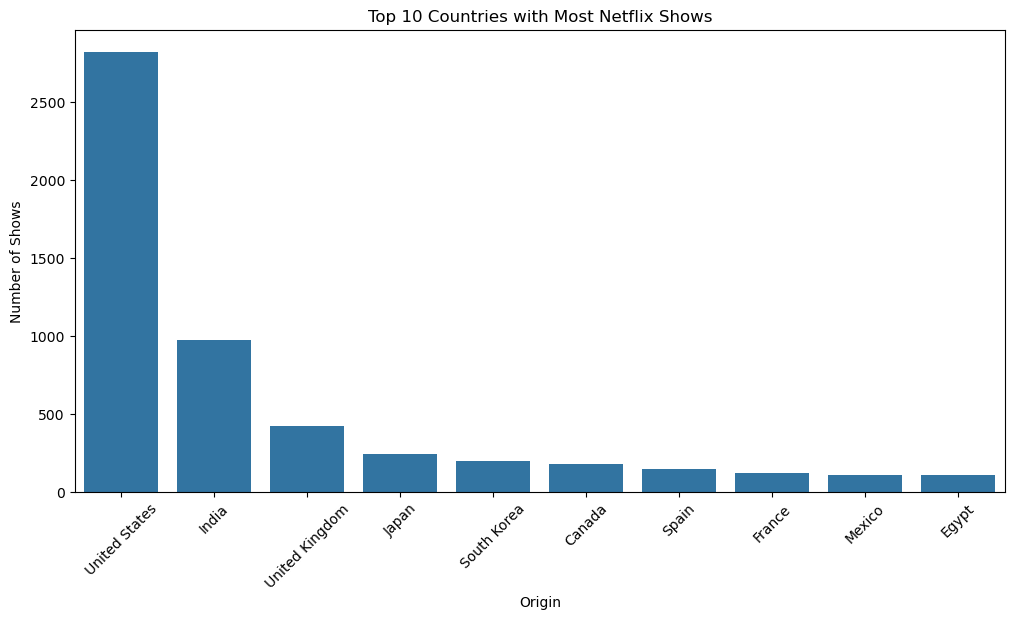

In [261]:
#Simple Data Visualization
# Top 10 countries with the most shows
plt.figure(figsize=(12, 6))
top_countries = df['origin'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Most Netflix Shows')
plt.xticks(rotation=45)
plt.xlabel('Origin')
plt.ylabel('Number of Shows')
plt.show()


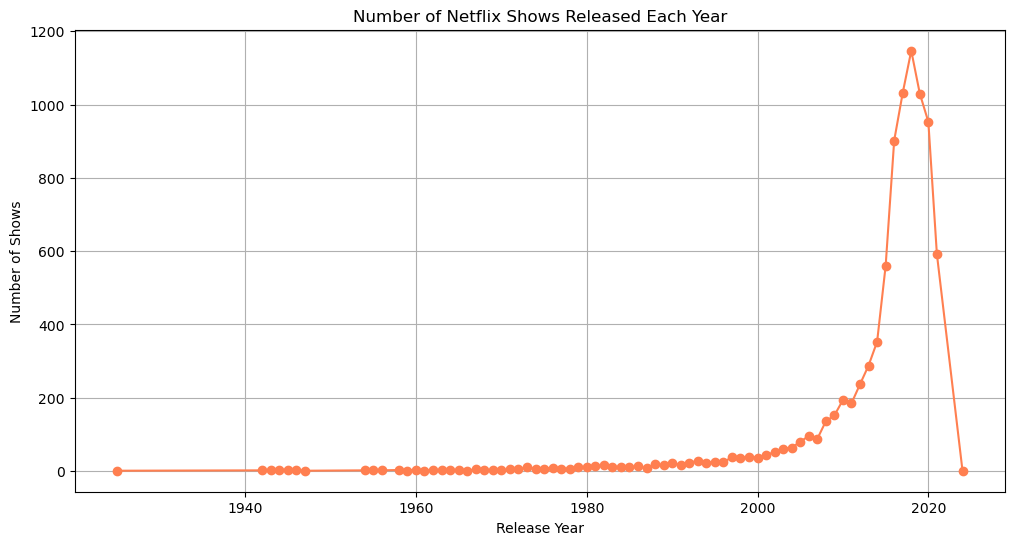

In [263]:
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='coral')
plt.title('Number of Netflix Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()


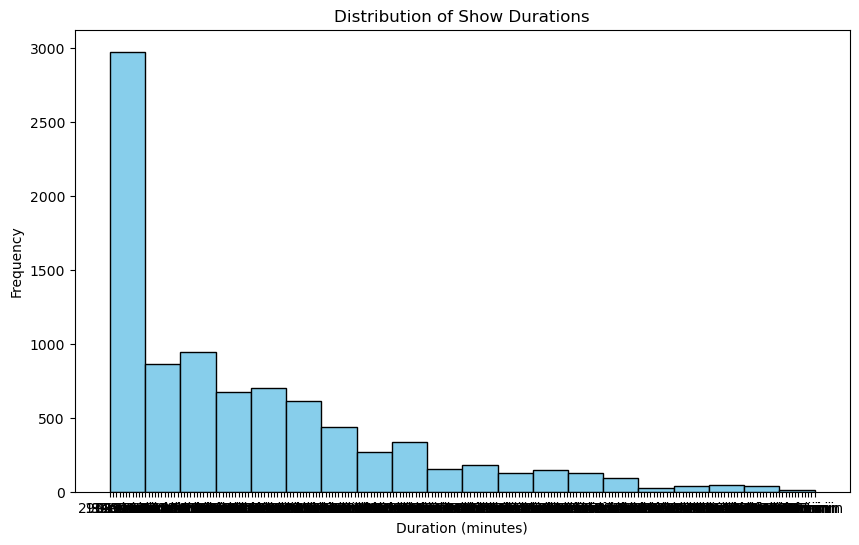

In [265]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Show Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


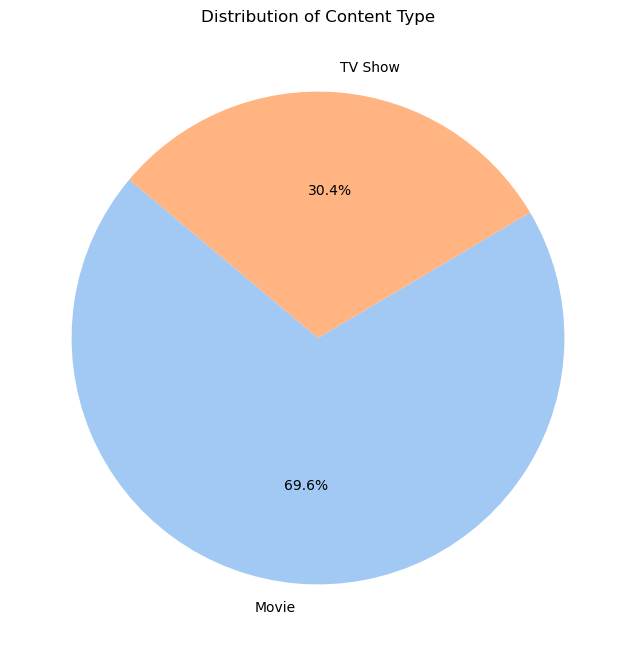

In [267]:
plt.figure(figsize=(8, 8))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Content Type')
plt.ylabel('')
plt.show()


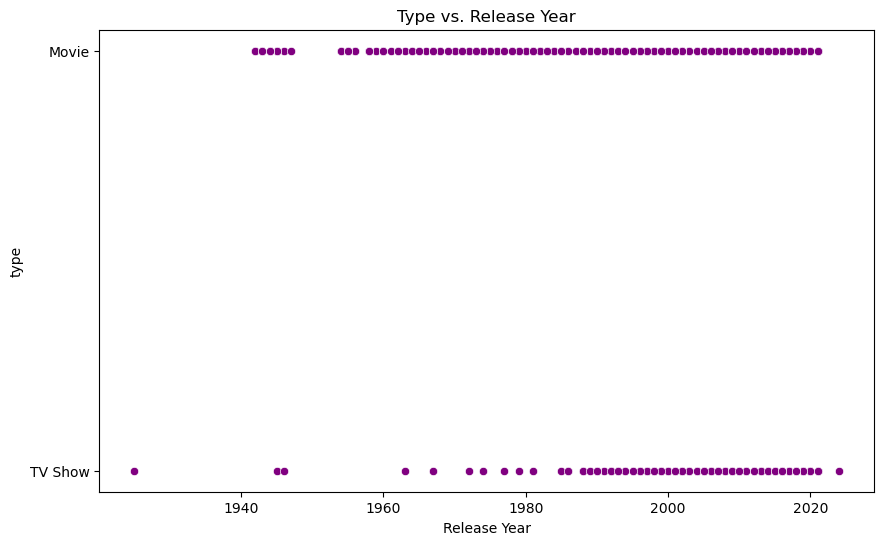

In [271]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='type', data=df, color='purple')
plt.title('Type vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('type')
plt.show()


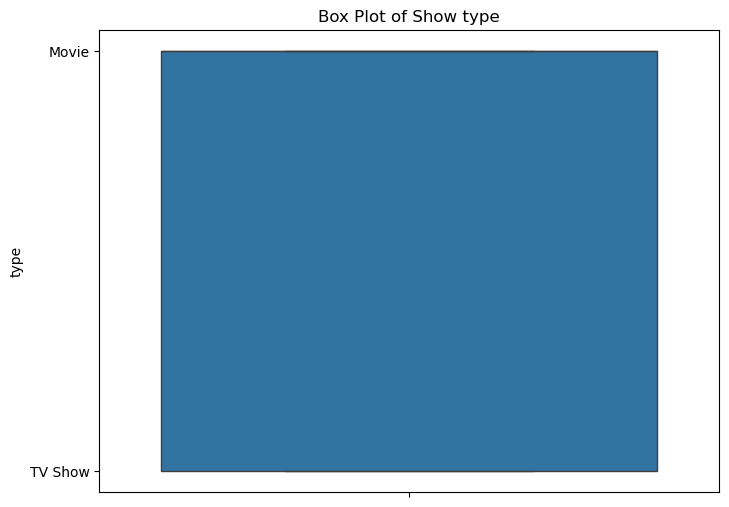

In [279]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='type', data=df)
plt.title('Box Plot of Show type')
plt.show()


In [281]:
#Basic String Manipulation

# Convert 'origin' column to lowercase
df['origin'] = df['origin'].str.lower()

print("Origin column converted to lowercase:")
print(df['origin'].head())


Origin column converted to lowercase:
0    united states
1     south africa
2              NaN
3              NaN
4            india
Name: origin, dtype: object


In [283]:
# Extract first 3 characters from 'city' column
df['origin_first_3_chars'] = df['origin'].str[:3]

print("First 3 characters of each city:")
print(df[['origin', 'origin_first_3_chars']].head())


First 3 characters of each city:
          origin origin_first_3_chars
0  united states                  uni
1   south africa                  sou
2            NaN                  NaN
3            NaN                  NaN
4          india                  ind


In [303]:
# Replace spaces with underscores in 'origin'
df['origin'] = df['origin'].str.replace(' ', '_', regex=True)

print("Origin names with underscores instead of spaces:")
print(df['origin'].head())

Origin names with underscores instead of spaces:
0    united_states
1     south_africa
2              NaN
3              NaN
4            india
Name: origin, dtype: object


In [305]:
#iloc - Integer-location based indexing
print("First row of the dataset:")
print(df.iloc[0])

First row of the dataset:
show_id                                                                s1
type                                                                Movie
title                                                Dick Johnson Is Dead
director                                                  Kirsten Johnson
cast                                                                  NaN
origin                                                      united_states
release_year                                                         2020
rating                                                              PG-13
duration                                                           90 min
listed_in                                                   Documentaries
description             As her father nears the end of his life, filmm...
origin_first_3_chars                                                  uni
Name: 0, dtype: object


In [307]:
print("Last 3 rows of the dataset:")
print(df.iloc[-3:])


Last 3 rows of the dataset:
     show_id     type               title      director  \
8806   s8807    Movie              Zubaan   Mozez Singh   
8807   s8808  TV Show  Parasyte: The Grey  Yeon Sang-ho   
8808   s8809    Movie              Serena  Susanne Bier   

                                                   cast         origin  \
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          india   
8807         Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan    south_korea   
8808  Bradley Cooper, Jennifer Lawrence, Toby Jones,...  united_states   

      release_year rating  duration  \
8806          2015  TV-14   111 min   
8807          2024  TV-MA  1 Season   
8808          2014      A   110 min   

                                           listed_in  \
8806  Dramas, International Movies, Music & Musicals   
8807                          Sci-fi, Horror, Action   
8808                        Drama, Romance, Thriller   

                                            description 

In [309]:
print("First 5 rows and first 3 columns:")
print(df.iloc[:5, :3])


First 5 rows and first 3 columns:
  show_id     type                  title
0      s1    Movie   Dick Johnson Is Dead
1      s2  TV Show          Blood & Water
2      s3  TV Show              Ganglands
3      s4  TV Show  Jailbirds New Orleans
4      s5  TV Show           Kota Factory


In [311]:
print("All rows with only the 2nd and 3rd columns:")
print(df.iloc[:, 1:3])


All rows with only the 2nd and 3rd columns:
         type                  title
0       Movie   Dick Johnson Is Dead
1     TV Show          Blood & Water
2     TV Show              Ganglands
3     TV Show  Jailbirds New Orleans
4     TV Show           Kota Factory
...       ...                    ...
8804    Movie             Zombieland
8805    Movie                   Zoom
8806    Movie                 Zubaan
8807  TV Show     Parasyte: The Grey
8808    Movie                 Serena

[8809 rows x 2 columns]


In [313]:
print("Value at 4th row and 2nd column:")
print(df.iloc[3, 1])


Value at 4th row and 2nd column:
TV Show


In [315]:
print("Rows 2 to 5 and columns 1 to 4:")
print(df.iloc[1:5, 0:4])


Rows 2 to 5 and columns 1 to 4:
  show_id     type                  title         director
1      s2  TV Show          Blood & Water                 
2      s3  TV Show              Ganglands  Julien Leclercq
3      s4  TV Show  Jailbirds New Orleans                 
4      s5  TV Show           Kota Factory                 


In [321]:
#loc - Label-based indexing

print("Row where title is 'Inception':")
print(df.loc[df['title'] == 'Inception'])


Row where title is 'Inception':
    show_id   type      title           director  \
340    s341  Movie  Inception  Christopher Nolan   

                                                  cast  \
340  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   

                            origin  release_year rating duration  \
340  united_states,_united_kingdom          2010  PG-13  148 min   

                                           listed_in  \
340  Action & Adventure, Sci-Fi & Fantasy, Thrillers   

                                           description origin_first_3_chars  
340  A troubled thief who extracts secrets from peo...                  uni  


In [323]:
print("Rows where release_year is greater than 2015:")
print(df.loc[df['release_year'] > 2015])


Rows where release_year is greater than 2015:
     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water                    
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans                    
4         s5  TV Show           Kota Factory                    
...      ...      ...                    ...              ...   
8794   s8795    Movie           Ø§Ø´ØªØ¨Ø§Ù     Mohamed Diab   
8796   s8797  TV Show             Yunus Emre                    
8797   s8798  TV Show              Zak Storm                    
8803   s8804  TV Show            Zombie Dumb                    
8807   s8808  TV Show     Parasyte: The Grey     Yeon Sang-ho   

                                                   cast  \
0                                                   NaN   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...

In [327]:
print("Origins where release_year is between 2010 and 2020:")
print(df.loc[(df['release_year'] >= 2010) & (df['release_year'] <= 2020), 'origin'])


Origins where release_year is between 2010 and 2020:
0                      united_states
16                               NaN
17                            mexico
21                            turkey
27                     united_states
                    ...             
8800                        pakistan
8801    united_arab_emirates,_jordan
8803                             NaN
8806                           india
8808                   united_states
Name: origin, Length: 6881, dtype: object


In [329]:
print("All rows where origin is 'United States':")
print(df.loc[df['origin'] == 'United States'])


All rows where origin is 'United States':
Empty DataFrame
Columns: [show_id, type, title, director, cast, origin, release_year, rating, duration, listed_in, description, origin_first_3_chars]
Index: []


In [331]:
print("Title and Director for row 0:")
print(df.loc[0, ['title', 'director']])


Title and Director for row 0:
title       Dick Johnson Is Dead
director         Kirsten Johnson
Name: 0, dtype: object


In [335]:
print("Rows where release_year is greater than 2015 and origin is 'India':")
print(df.loc[(df['release_year'] > 2015) & (df['origin'] == 'India')])


Rows where release_year is greater than 2015 and origin is 'India':
Empty DataFrame
Columns: [show_id, type, title, director, cast, origin, release_year, rating, duration, listed_in, description, origin_first_3_chars]
Index: []


In [343]:
#Replacing values in a DataFrame

# Replace "United States" with "USA"
df['origin'] = df['origin'].replace('United States', 'USA')

print("Updated 'origin' column:")
print(df['origin'].value_counts())


Updated 'origin' column:
origin
united_states                             2819
india                                      972
united_kingdom                             419
japan                                      245
south_korea                                200
                                          ... 
romania,_bulgaria,_hungary                   1
uruguay,_guatemala                           1
france,_senegal,_belgium                     1
mexico,_united_states,_spain,_colombia       1
united_arab_emirates,_jordan                 1
Name: count, Length: 748, dtype: int64


In [345]:
# Replace 0 with NaN in 'duration'
df['duration'] = df['duration'].replace(0, np.nan)

print("Updated 'duration' column:")
print(df['duration'].head())


Updated 'duration' column:
0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object


In [347]:
# Replace all occurrences of 100 with 50 in the entire DataFrame
df.replace(100, 50, inplace=True)

print("Updated DataFrame with 100 replaced by 50:")
print(df.head())


Updated DataFrame with 100 replaced by 50:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water                    
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans                    
4      s5  TV Show           Kota Factory                    

                                                cast         origin  \
0                                                NaN  united_states   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   south_africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          india   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3        

In [353]:
# Convert 'release_year' to numeric (in case it’s stored as strings)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Replace 'NA' with the mean of the column
mean_year = int(df['release_year'].mean())
df['release_year'] = df['release_year'].replace('NA', mean_year)

print("Updated 'release_year' column:")
print(df['release_year'].head())



Updated 'release_year' column:
0    2020
1    2021
2    2021
3    2021
4    2021
Name: release_year, dtype: int64


In [355]:
#index - Indexing and resetting index
# Set 'title' as the index
df.set_index('title', inplace=True)

print("DataFrame with 'title' as the index:")
print(df.head())


DataFrame with 'title' as the index:
                      show_id     type         director  \
title                                                     
Dick Johnson Is Dead       s1    Movie  Kirsten Johnson   
Blood & Water              s2  TV Show                    
Ganglands                  s3  TV Show  Julien Leclercq   
Jailbirds New Orleans      s4  TV Show                    
Kota Factory               s5  TV Show                    

                                                                    cast  \
title                                                                      
Dick Johnson Is Dead                                                 NaN   
Blood & Water          Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
Ganglands              Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
Jailbirds New Orleans                                                NaN   
Kota Factory           Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   

                

In [357]:
# Reset index (back to default integer index)
df.reset_index(inplace=True)

print("DataFrame with reset index:")
print(df.head())


DataFrame with reset index:
                   title show_id     type         director  \
0   Dick Johnson Is Dead      s1    Movie  Kirsten Johnson   
1          Blood & Water      s2  TV Show                    
2              Ganglands      s3  TV Show  Julien Leclercq   
3  Jailbirds New Orleans      s4  TV Show                    
4           Kota Factory      s5  TV Show                    

                                                cast         origin  \
0                                                NaN  united_states   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   south_africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          india   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA  

In [359]:
# Set multi-level index
df.set_index(['origin', 'release_year'], inplace=True)

print("DataFrame with multi-level index (origin and release_year):")
print(df.head())


DataFrame with multi-level index (origin and release_year):
                                            title show_id     type  \
origin        release_year                                           
united_states 2020           Dick Johnson Is Dead      s1    Movie   
south_africa  2021                  Blood & Water      s2  TV Show   
NaN           2021                      Ganglands      s3  TV Show   
              2021          Jailbirds New Orleans      s4  TV Show   
india         2021                   Kota Factory      s5  TV Show   

                                   director  \
origin        release_year                    
united_states 2020          Kirsten Johnson   
south_africa  2021                            
NaN           2021          Julien Leclercq   
              2021                            
india         2021                            

                                                                         cast  \
origin        release_year            

In [363]:
# Access all rows where country is 'India'
print("Rows where origin is 'India':")
print(df.loc['india'])


Rows where origin is 'India':
                                      title show_id     type  \
release_year                                                   
2021                           Kota Factory      s5  TV Show   
1998                                  Jeans     s25    Movie   
2021                           Chhota Bheem     s40  TV Show   
2014                          Dharmakshetra     s51  TV Show   
2014          Raja Rasoi Aur Anya Kahaniyan     s67  TV Show   
...                                     ...     ...      ...   
2006                    Yanda Kartavya Aahe   s8774    Movie   
2018                        Yeh Meri Family   s8776  TV Show   
2014                               Zed Plus   s8799    Movie   
2009                                  Zenda   s8800    Movie   
2015                                 Zubaan   s8807    Movie   

                             director  \
release_year                            
2021                                    
1998          

In [379]:
# Check index type and uniqueness
print("Index type:", type(df.index))
print("Is index unique?", df.index.is_unique)


Index type: <class 'pandas.core.indexes.range.RangeIndex'>
Is index unique? True


In [381]:
# Rename the index labels
df.index = ['Row_' + str(i) for i in range(1, len(df) + 1)]

print("DataFrame with renamed index labels:")
print(df.head())


DataFrame with renamed index labels:
                                                  origin  release_year  \
Row_1                                      united_states          2020   
Row_2                                       south_africa          2021   
Row_3                                                NaN          2021   
Row_4                                              india          2021   
Row_5  united_states,_ghana,_burkina_faso,_united_kin...          1993   

                      title show_id     type         director  \
Row_1  Dick Johnson Is Dead      s1    Movie  Kirsten Johnson   
Row_2         Blood & Water      s2  TV Show                    
Row_3             Ganglands      s3  TV Show  Julien Leclercq   
Row_4          Kota Factory      s5  TV Show                    
Row_5               Sankofa      s8    Movie     Haile Gerima   

                                                    cast rating   duration  \
Row_1                                            

In [385]:
#groupby - Grouping data

print("Average release year for each origin:")
print(df.groupby('origin')['release_year'].mean())


Average release year for each origin:
origin
,_france,_algeria                                      2014.0
,_south_korea                                          2021.0
argentina                                              2010.5
argentina,_brazil,_france,_poland,_germany,_denmark    2017.0
argentina,_chile                                       2011.5
                                                        ...  
venezuela                                              2017.0
venezuela,_colombia                                    2007.0
vietnam                                                2017.5
west_germany                                           1977.0
zimbabwe                                               2017.0
Name: release_year, Length: 748, dtype: float64


In [387]:
print("Count of shows for each release year:")
print(df.groupby('release_year').size())


Count of shows for each release year:
release_year
1925      1
1942      1
1943      1
1944      2
1945      1
       ... 
2018    169
2019    140
2020    108
2021     76
2024      1
Length: 75, dtype: int64


In [389]:
print("Count of Movies and TV Shows:")
print(df.groupby('type').size())


Count of Movies and TV Shows:
type
Movie      1399
TV Show     395
dtype: int64


In [393]:
print("Total duration of shows by origin:")
print(df.groupby('origin')['duration'].sum())


Total duration of shows by origin:
origin
,_france,_algeria                                                                                103 min
,_south_korea                                                                                   1 Season
argentina                                              1 Season95 min1 Season1 Season106 min1 Season1...
argentina,_brazil,_france,_poland,_germany,_denmark                                               96 min
argentina,_chile                                                                           112 min78 min
                                                                             ...                        
venezuela                                                                                        119 min
venezuela,_colombia                                                                               82 min
vietnam                                                         117 min117 min93 min116 min112 min92 min
west_germany 

In [395]:
print("Number of unique shows per origin:")
print(df.groupby('origin')['title'].nunique())


Number of unique shows per origin:
origin
,_france,_algeria                                       1
,_south_korea                                           1
argentina                                              12
argentina,_brazil,_france,_poland,_germany,_denmark     1
argentina,_chile                                        2
                                                       ..
venezuela                                               1
venezuela,_colombia                                     1
vietnam                                                 6
west_germany                                            1
zimbabwe                                                1
Name: title, Length: 748, dtype: int64


In [397]:
print("Count of shows by origin and release year:")
print(df.groupby(['origin', 'release_year']).size())


Count of shows by origin and release year:
origin             release_year
,_france,_algeria  2014            1
,_south_korea      2021            1
argentina          1985            1
                   1998            1
                   2004            1
                                  ..
vietnam            2019            1
                   2020            1
                   2021            1
west_germany       1977            1
zimbabwe           2017            1
Length: 1755, dtype: int64


In [399]:
#aggregation - Performing multiple aggregations

print("Mean and median release year for each origin:")
print(df.groupby('origin')['release_year'].agg(['mean', 'median']))


Mean and median release year for each origin:
                                                      mean  median
origin                                                            
,_france,_algeria                                   2014.0  2014.0
,_south_korea                                       2021.0  2021.0
argentina                                           2010.5  2015.5
argentina,_brazil,_france,_poland,_germany,_den...  2017.0  2017.0
argentina,_chile                                    2011.5  2011.5
...                                                    ...     ...
venezuela                                           2017.0  2017.0
venezuela,_colombia                                 2007.0  2007.0
vietnam                                             2017.5  2017.5
west_germany                                        1977.0  1977.0
zimbabwe                                            2017.0  2017.0

[748 rows x 2 columns]


In [405]:
print("Release year stats by origin:")
print(df.groupby('origin')['release_year'].agg(['min', 'max', 'count']))



Release year stats by origin:
                                                     min   max  count
origin                                                               
,_france,_algeria                                   2014  2014      1
,_south_korea                                       2021  2021      1
argentina                                           1985  2021     12
argentina,_brazil,_france,_poland,_germany,_den...  2017  2017      1
argentina,_chile                                    2006  2017      2
...                                                  ...   ...    ...
venezuela                                           2017  2017      1
venezuela,_colombia                                 2007  2007      1
vietnam                                             2014  2021      6
west_germany                                        1977  1977      1
zimbabwe                                            2017  2017      1

[748 rows x 3 columns]


In [415]:
# Custom function to calculate range (max - min)
def year_range(x):
    return x.max() - x.min()

print("Range of release years per origin:")
print(df.groupby('origin')['release_year'].agg(year_range))




Range of release years per origin:
origin
,_france,_algeria                                       0
,_south_korea                                           0
argentina                                              36
argentina,_brazil,_france,_poland,_germany,_denmark     0
argentina,_chile                                       11
                                                       ..
venezuela                                               0
venezuela,_colombia                                     0
vietnam                                                 7
west_germany                                            0
zimbabwe                                                0
Name: release_year, Length: 748, dtype: int64


In [421]:
#faker - Generating Fake Data for Testing:

!pip install faker


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/1.9 MB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.9 MB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.3/1.9 MB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/1.9 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 1.4 MB/s eta 0:00:00


In [422]:
import pandas as pd
from faker import Faker

# Initialize Faker
fake = Faker()

# Create a fake dataset
data = {
    'Name': [fake.name() for _ in range(100)],
    'Address': [fake.address() for _ in range(100)],
    'Date': [fake.date() for _ in range(100)]
}

# Convert to DataFrame
df_fake = pd.DataFrame(data)
print(df_fake.head())


              Name                                            Address  \
0  Elizabeth Smith      08758 Gutierrez Road\nJohnathanfurt, TX 81275   
1   Casey Harrison             673 Ward Harbor\nNielsenview, CT 69944   
2       Noah Perry                   Unit 0338 Box 1362\nDPO AA 42804   
3    George Rogers  903 King Inlet Apt. 179\nWest Katherinefort, K...   
4      James Berry  35362 Williams Union\nPort Christophermouth, A...   

         Date  
0  2003-04-01  
1  2004-10-23  
2  1984-03-06  
3  1994-09-15  
4  1973-10-31  


In [425]:
df_fake['Email'] = [fake.email() for _ in range(100)]
print(df_fake[['Name', 'Email']].head())


              Name                       Email
0  Elizabeth Smith     catherine66@example.com
1   Casey Harrison       ematthews@example.org
2       Noah Perry  gregoryjohnson@example.com
3    George Rogers         lburton@example.org
4      James Berry       zgonzales@example.org


In [427]:
df_fake['Birth_Date'] = [fake.date_of_birth(minimum_age=18, maximum_age=70) for _ in range(100)]
df_fake['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_fake['Birth_Date']).dt.year
print(df_fake[['Name', 'Birth_Date', 'Age']].head())


              Name  Birth_Date  Age
0  Elizabeth Smith  1982-01-27   43
1   Casey Harrison  1985-01-05   40
2       Noah Perry  1999-10-23   26
3    George Rogers  1966-12-21   59
4      James Berry  1964-10-25   61


In [429]:
data_products = {
    'Product_Name': [fake.word() for _ in range(10)],
    'Price': [round(fake.random_number(digits=2), 2) for _ in range(10)]
}

df_products = pd.DataFrame(data_products)
print(df_products)


  Product_Name  Price
0       minute     42
1        quite     90
2       around     10
3        which     47
4    president     15
5   everything     28
6    knowledge     61
7     approach     20
8       change     94
9    authority     73


In [431]:
data_users = {
    'Name': [fake.name() for _ in range(50)],
    'City': [fake.city() for _ in range(50)],
    'Phone_Number': [fake.phone_number() for _ in range(50)]
}

df_users = pd.DataFrame(data_users)
print(df_users.head())


              Name               City        Phone_Number
0   Madison Willis          Jonesfurt       (538)727-8455
1       Julia Cole  East Jessicamouth    001-514-776-1669
2    Michael Smith        Marcushaven  (764)498-8060x4134
3   Katrina Keller        Stewartview        278.477.6086
4  Joshua Harrison          Davidstad  826.487.4651x44572


In [433]:
#merge - Merging DataFrames:

# Sample DataFrames
df1 = pd.DataFrame({'Product_ID': [1, 2, 3], 'Product_Name': ['A', 'B', 'C']})
df2 = pd.DataFrame({'Product_ID': [1, 2, 4], 'Price': [100, 150, 200]})

# Merge on 'Product_ID'
merged_df = pd.merge(df1, df2, on='Product_ID')

print("Merged DataFrame:")
print(merged_df)


Merged DataFrame:
   Product_ID Product_Name  Price
0           1            A    100
1           2            B    150


In [435]:
left_join_df = pd.merge(df1, df2, on='Product_ID', how='left')

print("Left Join DataFrame:")
print(left_join_df)


Left Join DataFrame:
   Product_ID Product_Name  Price
0           1            A  100.0
1           2            B  150.0
2           3            C    NaN


In [438]:
outer_join_df = pd.merge(df1, df2, on='Product_ID', how='outer')

print("Outer Join DataFrame:")
print(outer_join_df)


Outer Join DataFrame:
   Product_ID Product_Name  Price
0           1            A  100.0
1           2            B  150.0
2           3            C    NaN
3           4          NaN  200.0


In [440]:
df1 = pd.DataFrame({'city': ['New York', 'Los Angeles', 'Chicago'], 'release_year': [2020, 2019, 2021], 'title': ['Movie A', 'Movie B', 'Movie C']})
df2 = pd.DataFrame({'city': ['New York', 'Los Angeles', 'Houston'], 'release_year': [2020, 2019, 2021], 'rating': ['PG-13', 'R', 'G']})

merged_df = pd.merge(df1, df2, on=['city', 'release_year'], how='inner')

print("Merged on multiple columns:")
print(merged_df)


Merged on multiple columns:
          city  release_year    title rating
0     New York          2020  Movie A  PG-13
1  Los Angeles          2019  Movie B      R


In [442]:
df1 = pd.DataFrame({'Country': ['USA', 'Canada', 'UK'], 'Population': [330, 38, 68]})
df2 = pd.DataFrame({'Country': ['USA', 'Canada', 'Australia'], 'Continent': ['North America', 'North America', 'Oceania']})

inner_join_df = pd.merge(df1, df2, on='Country', how='inner')

print("Inner Join DataFrame:")
print(inner_join_df)


Inner Join DataFrame:
  Country  Population      Continent
0     USA         330  North America
1  Canada          38  North America


In [444]:
full_outer_df = pd.merge(df1, df2, on='Country', how='outer')

print("Full Outer Join DataFrame:")
print(full_outer_df)


Full Outer Join DataFrame:
     Country  Population      Continent
0  Australia         NaN        Oceania
1     Canada        38.0  North America
2         UK        68.0            NaN
3        USA       330.0  North America


In [446]:
#Saving and Exporting Data:

# Save DataFrame to CSV
df.to_csv('netflix_cleaned.csv', index=False)

print("DataFrame saved to 'netflix_cleaned.csv'")


DataFrame saved to 'netflix_cleaned.csv'


In [448]:
# Save DataFrame to Excel
df.to_excel('netflix_cleaned.xlsx', index=False)

print("DataFrame saved to 'netflix_cleaned.xlsx'")


DataFrame saved to 'netflix_cleaned.xlsx'


In [488]:
#COMPULSORY QUESTION:
#1. Complex Filtering and Aggregation:

# Step 1: Filter rows where release_year is between 2003 and 2020 and origin is "Los Angeles"
filtered_df = df[(df['release_year'] >= 2003) & (df['release_year'] <= 2020) & (df['origin'] == 'india')]
print("Filtered DataFrame (Age 2003-2020, origin = india):")
print(filtered_df)


Filtered DataFrame (Age 2003-2020, origin = india):
        origin  release_year                                title show_id  \
Row_29   india          2014                        Dharmakshetra     s51   
Row_42   india          2015       Stories by Rabindranath Tagore     s70   
Row_56   india          2017                     Angamaly Diaries    s106   
Row_65   india          2020                              Shikara    s127   
Row_110  india          2008                           C Kkompany    s193   
Row_113  india          2006                           Koi Aap Sa    s200   
Row_114  india          2004                      Krishna Cottage    s201   
Row_115  india          2003                         Kucch To Hai    s202   
Row_116  india          2005                    Kyaa Kool Hai Hum    s203   
Row_117  india          2016                 Kyaa Kool Hain Hum 3    s204   
Row_118  india          2012             Kyaa Super Kool Hain Hum    s205   
Row_120  india          

In [490]:
# Step 2: Group by title and calculate mean and median of release_year
release_year_stats = filtered_df.groupby('title')['release_year'].agg(['mean', 'median'])

print("\nMean and Median of release_year grouped by title:")
print(release_year_stats)


Mean and Median of release_year grouped by title:
                                       mean  median
title                                              
Angamaly Diaries                     2017.0  2017.0
C Kkompany                           2008.0  2008.0
Chhota Bheem aur Krishna             2009.0  2009.0
Dharmakshetra                        2014.0  2014.0
Koi Aap Sa                           2006.0  2006.0
Krishna Cottage                      2004.0  2004.0
Kucch To Hai                         2003.0  2003.0
Kyaa Kool Hai Hum                    2005.0  2005.0
Kyaa Kool Hain Hum 3                 2016.0  2016.0
Kyaa Super Kool Hain Hum             2012.0  2012.0
LSD: Love, Sex Aur Dhokha            2010.0  2010.0
Once Upon a Time in Mumbai Dobaara!  2013.0  2013.0
Ragini MMS                           2011.0  2011.0
Ram Prasad Ki Tehrvi                 2019.0  2019.0
Shikara                              2020.0  2020.0
Shootout at Lokhandwala              2007.0  2007.0
Stories by Ra

In [492]:
# Step 3: Sort the result in descending order by Age
sorted_release_year_stats = release_year_stats.sort_values(by='mean', ascending=False)

print("\nSorted by release_year (descending):")
print(sorted_release_year_stats)



Sorted by release_year (descending):
                                       mean  median
title                                              
Shikara                              2020.0  2020.0
Ram Prasad Ki Tehrvi                 2019.0  2019.0
Truckbhar Swapna                     2018.0  2018.0
Angamaly Diaries                     2017.0  2017.0
Kyaa Kool Hain Hum 3                 2016.0  2016.0
Stories by Rabindranath Tagore       2015.0  2015.0
Dharmakshetra                        2014.0  2014.0
Once Upon a Time in Mumbai Dobaara!  2013.0  2013.0
Kyaa Super Kool Hain Hum             2012.0  2012.0
Ragini MMS                           2011.0  2011.0
LSD: Love, Sex Aur Dhokha            2010.0  2010.0
Chhota Bheem aur Krishna             2009.0  2009.0
C Kkompany                           2008.0  2008.0
Shootout at Lokhandwala              2007.0  2007.0
Koi Aap Sa                           2006.0  2006.0
Kyaa Kool Hai Hum                    2005.0  2005.0
Krishna Cottage           

In [523]:
#3. Multiple Data Transformations and Merging:

#step 1: Normalize the release_year column:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ensure 'release_year' is numeric
df.loc[:, 'release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'release_year' column
df.loc[:, 'release_year_Normalized'] = scaler.fit_transform(df[['release_year']])

print("Normalized 'release_year' column:")
print(df[['release_year', 'release_year_Normalized']].head())

Normalized 'release_year' column:
       release_year  release_year_Normalized
Row_1          2020                 0.959596
Row_2          2021                 0.969697
Row_3          2021                 0.969697
Row_4          2021                 0.969697
Row_5          1993                 0.686869


In [527]:
# step 2: Replace negative values in release_year:
df.loc[:, 'release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Calculate the median age
median_age = df['release_year'].median()

# Replace negative ages with median age
df.loc[:, 'release_year'] = df['release_year'].apply(lambda x: median_age if x < 0 else x)

print("\nrelease_year column with negative values replaced by median:")
print(df[['release_year']].head())



release_year column with negative values replaced by median:
       release_year
Row_1          2020
Row_2          2021
Row_3          2021
Row_4          2021
Row_5          1993


In [539]:
# step 3:#  Merge both DataFrames:
import pandas as pd

# Sample product_data DataFrame
product_data = pd.DataFrame({
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'Price': [100, 150, 200, 250, 300]
})

# Merge on 'title'
merged_df = pd.merge(df, product_data, on='title', how='inner')

print("Merged DataFrame (first 5 rows):")
print(merged_df.head())



Merged DataFrame (first 5 rows):
Empty DataFrame
Columns: [origin, release_year, title, show_id, type, director, cast, rating, duration, listed_in, description, origin_first_3_chars, First_Actor, duration_normalized, release_year_Normalized, Price]
Index: []


In [552]:
#Task 1: Product DataFrame with "Total Value" calculation

#Step 1: Create the DataFrame

import pandas as pd

# Create Product DataFrame
product_data = pd.DataFrame({
    'Product ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Product Name': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Phone', 
                     'Tablet', 'Headphones', 'Charger', 'Camera', 'Printer'],
    'Quantity': [5, 10, 8, 4, 6, 7, 9, 3, 2, 1],
    'Price': [700, 20, 50, 150, 600, 300, 100, 25, 400, 200]
})

# Save the original DataFrame
product_data.to_excel('Original_Product_Data.xlsx', index=False)

print("Original Product DataFrame:")
print(product_data)


Original Product DataFrame:
   Product ID Product Name  Quantity  Price
0         101       Laptop         5    700
1         102        Mouse        10     20
2         103     Keyboard         8     50
3         104      Monitor         4    150
4         105        Phone         6    600
5         106       Tablet         7    300
6         107   Headphones         9    100
7         108      Charger         3     25
8         109       Camera         2    400
9         110      Printer         1    200


In [554]:
#Step 2: Calculate "Total Value" and export
# Calculate Total Value (Quantity * Price)
product_data['Total Value'] = product_data['Quantity'] * product_data['Price']

# Export to Excel
product_data.to_excel('Modified_Product_Data.xlsx', index=False)

print("\nModified Product DataFrame with 'Total Value':")
print(product_data)



Modified Product DataFrame with 'Total Value':
   Product ID Product Name  Quantity  Price  Total Value
0         101       Laptop         5    700         3500
1         102        Mouse        10     20          200
2         103     Keyboard         8     50          400
3         104      Monitor         4    150          600
4         105        Phone         6    600         3600
5         106       Tablet         7    300         2100
6         107   Headphones         9    100          900
7         108      Charger         3     25           75
8         109       Camera         2    400          800
9         110      Printer         1    200          200


In [558]:
#Task 2: Student DataFrame with "Pass/Fail" status
#Step 1: Create the DataFrame
# Create Student DataFrame
student_data = pd.DataFrame({
    'Student ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Ella', 
              'Frank', 'Grace', 'Hannah', 'Ian', 'Jane'],
    'Grade': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'Score': [85, 40, 75, 30, 90, 45, 60, 55, 20, 80]
})

# Save the original DataFrame
student_data.to_excel('Original_Student_Data.xlsx', index=False)

print("Original Student DataFrame:")
print(student_data)


Original Student DataFrame:
   Student ID     Name Grade  Score
0           1    Alice     A     85
1           2      Bob     B     40
2           3  Charlie     C     75
3           4    David     A     30
4           5     Ella     B     90
5           6    Frank     C     45
6           7    Grace     A     60
7           8   Hannah     B     55
8           9      Ian     C     20
9          10     Jane     A     80


In [560]:
# Assign Pass/Fail based on Score
student_data['Pass/Fail'] = student_data['Score'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')

# Export to Excel
student_data.to_excel('Modified_Student_Data.xlsx', index=False)

print("\nModified Student DataFrame with 'Pass/Fail':")
print(student_data)



Modified Student DataFrame with 'Pass/Fail':
   Student ID     Name Grade  Score Pass/Fail
0           1    Alice     A     85      Pass
1           2      Bob     B     40      Fail
2           3  Charlie     C     75      Pass
3           4    David     A     30      Fail
4           5     Ella     B     90      Pass
5           6    Frank     C     45      Fail
6           7    Grace     A     60      Pass
7           8   Hannah     B     55      Pass
8           9      Ian     C     20      Fail
9          10     Jane     A     80      Pass


In [562]:
#Task 1: Student Data — Pass/Fail Status
#Step 1: Create CSV and Excel files with student data
#CSV file (students.csv):
import pandas as pd

# Create student data
student_data = pd.DataFrame({
    'Student ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Ella'],
    'Grade': ['A', 'B', 'C', 'B', 'A'],
    'Score': [85, 40, 75, 30, 90]
})

# Save to CSV and Excel
student_data.to_csv('students.csv', index=False)
student_data.to_excel('students.xlsx', index=False)

print("Student data saved to CSV and Excel.")


Student data saved to CSV and Excel.


In [564]:
#Step 2: Load the files and assign Pass/Fail
# Load CSV and Excel files
students_csv = pd.read_csv('students.csv')
students_excel = pd.read_excel('students.xlsx')

# Add 'Pass/Fail' column
students_csv['Pass/Fail'] = students_csv['Score'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')
students_excel['Pass/Fail'] = students_excel['Score'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')

# Save the modified files
students_csv.to_csv('students_modified.csv', index=False)
students_excel.to_excel('students_modified.xlsx', index=False)

print("Modified student data saved.")
print(students_csv)


Modified student data saved.
   Student ID     Name Grade  Score Pass/Fail
0           1    Alice     A     85      Pass
1           2      Bob     B     40      Fail
2           3  Charlie     C     75      Pass
3           4    David     B     30      Fail
4           5     Ella     A     90      Pass


In [566]:
#Task 2: City Data — Population Density
#Step 1: Create CSV and Excel files with city data
#CSV file (cities.csv):
# Create city data
city_data = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Country': ['USA', 'USA', 'USA', 'USA', 'USA'],
    'Population': [8419600, 3980400, 2716000, 2328000, 1690000],
    'Area': [783.8, 1302, 589, 1651, 1340]
})

# Save to CSV and Excel
city_data.to_csv('cities.csv', index=False)
city_data.to_excel('cities.xlsx', index=False)

print("City data saved to CSV and Excel.")


City data saved to CSV and Excel.


In [568]:
#Step 2: Load the files and calculate Population Density

# Load CSV and Excel files
cities_csv = pd.read_csv('cities.csv')
cities_excel = pd.read_excel('cities.xlsx')

# Calculate Population Density
cities_csv['Population Density'] = cities_csv['Population'] / cities_csv['Area']
cities_excel['Population Density'] = cities_excel['Population'] / cities_excel['Area']

# Save the modified files
cities_csv.to_csv('cities_modified.csv', index=False)
cities_excel.to_excel('cities_modified.xlsx', index=False)

print("Modified city data saved.")
print(cities_csv)


Modified city data saved.
          City Country  Population    Area  Population Density
0     New York     USA     8419600   783.8        10742.026027
1  Los Angeles     USA     3980400  1302.0         3057.142857
2      Chicago     USA     2716000   589.0         4611.205433
3      Houston     USA     2328000  1651.0         1410.054512
4      Phoenix     USA     1690000  1340.0         1261.194030
